# Data Analysis and Visualization of India Air Quality

Today air pollution has been one of the significant problems to deal with for any nation. In South Asia, it is ranked as the sixth most dangerous killer.
One does not realize the harmful effects of a problem if he/she has not experienced it in the first place.

## Dataset

Dataset is a cleaner version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).

In [2]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
dataset = pd.read_csv('C:\\Users\\Projects\\Air Quality Analysis\\dataset.csv')
df = dataset.copy()

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

In [10]:
df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()


Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [11]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

In [12]:
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [13]:
#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [15]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,396161.000000,394180.000000,366518.000000,167983.000000,9195.00000
mean,10.758950,26.178324,110.372334,227.394736,40.54719
std,11.116237,18.498946,75.322533,153.419324,30.42207
min,0.000000,0.000000,0.000000,0.000000,3.00000
25%,5.000000,14.000000,57.000000,115.000000,24.00000
50%,8.000000,22.000000,91.000000,194.000000,32.00000
75%,13.500000,32.900000,144.000000,306.000000,46.00000
max,909.000000,876.000000,6307.033333,2610.000000,504.00000


In [16]:
df.head(20)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,5/1/1990


In [17]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

### How many observations belong to each location

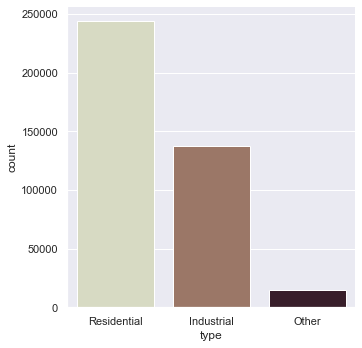

In [28]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.50", data = df)


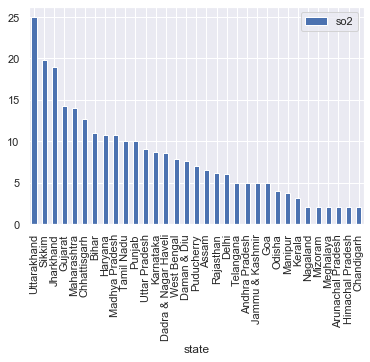

In [29]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

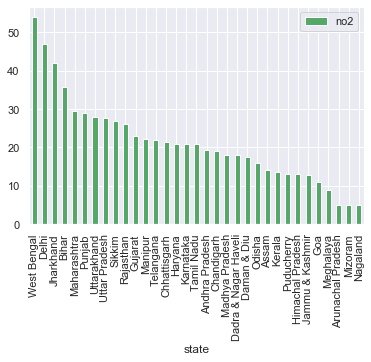

In [30]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'g')


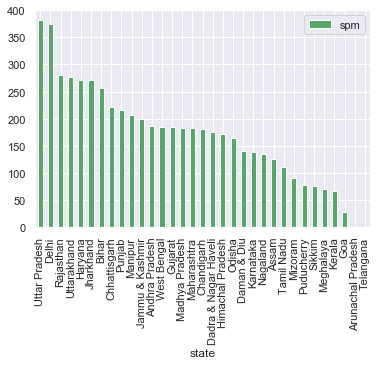

In [31]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'g')

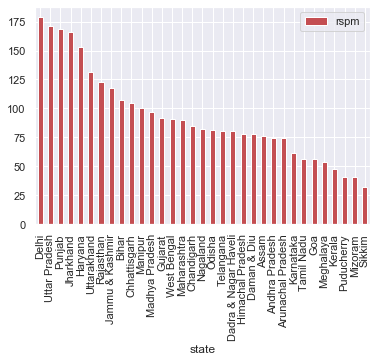

In [32]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')


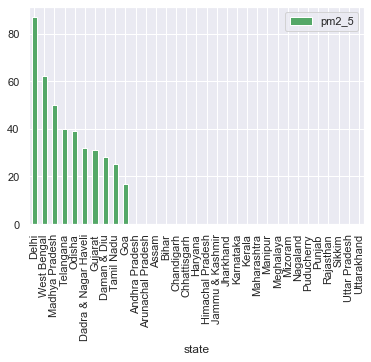

In [34]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'g')


## Statistical Analysis

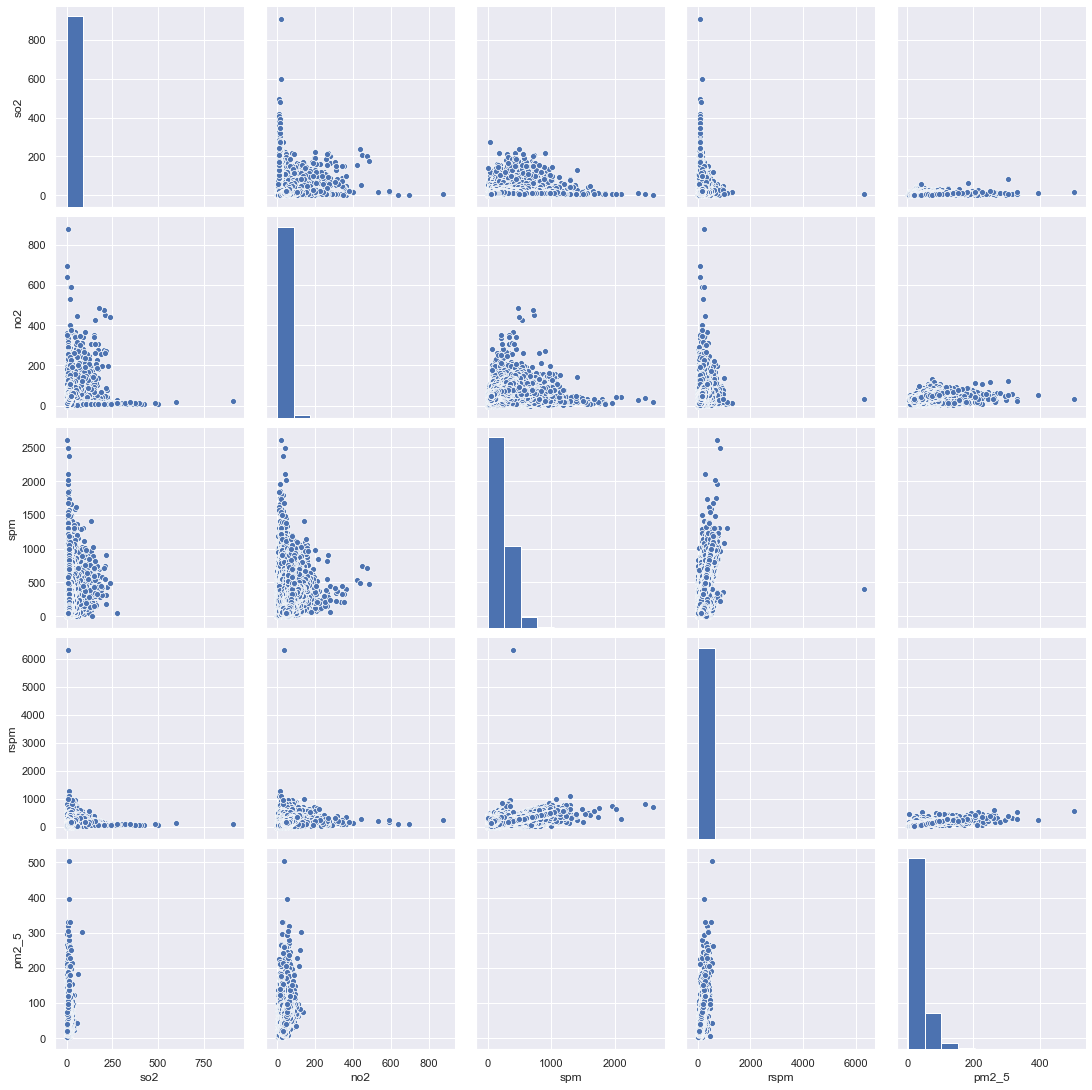

In [35]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'spm', 'rspm', 'pm2_5']
sns.pairplot(df[cols], size = 3.0)
plt.show()

#It takes some time to execute

## Correlation matrix


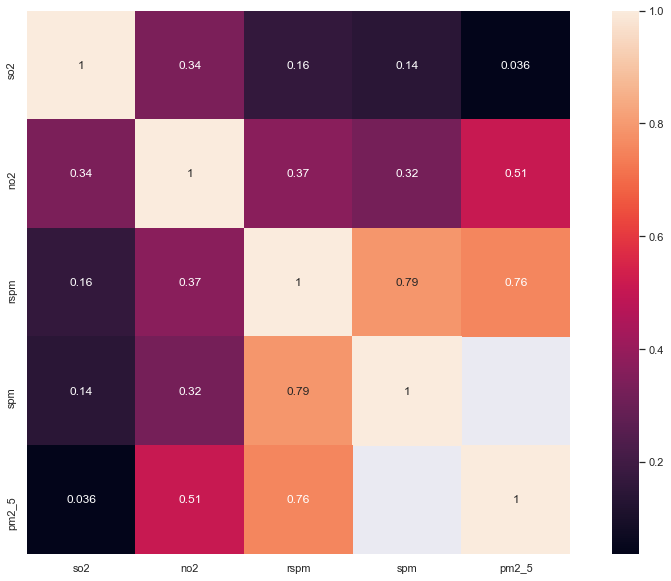

In [36]:

corr_matrix = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, vmax = 1, square = True, annot = True)

In [37]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [39]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### HeatMap

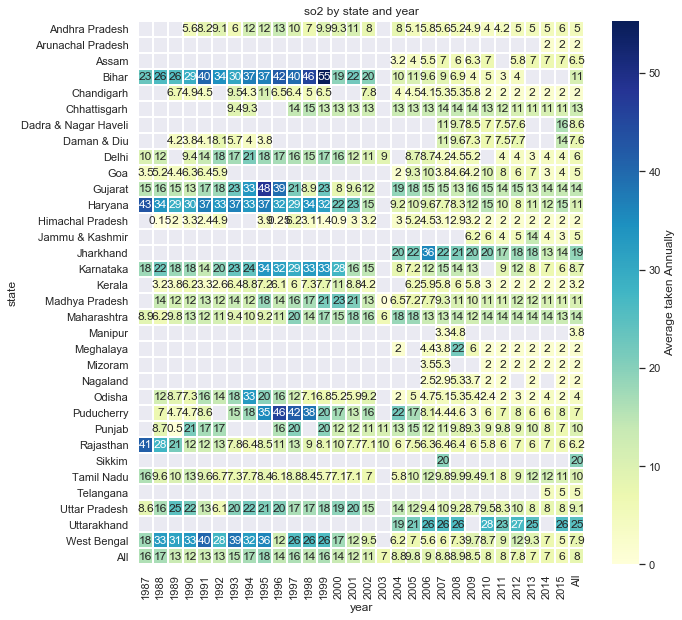

In [40]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

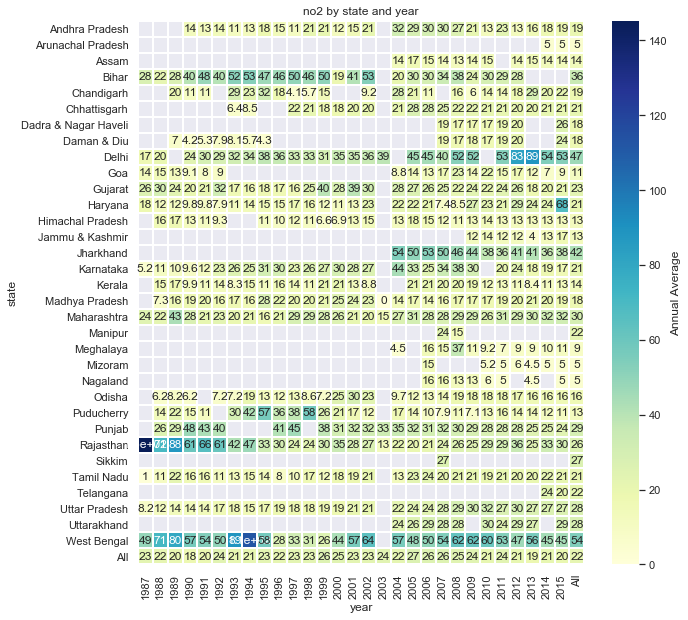

In [41]:
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


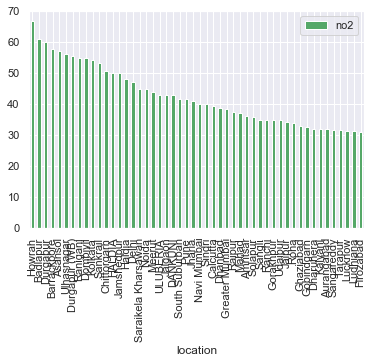

In [42]:
# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

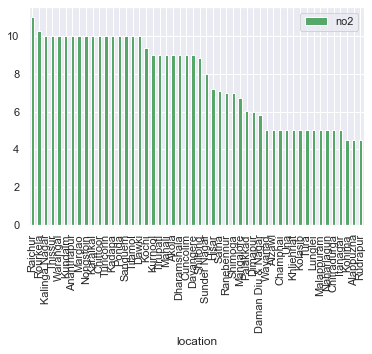

In [43]:
# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')


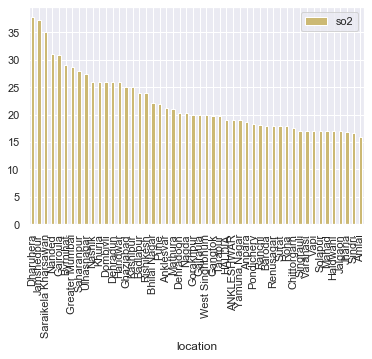

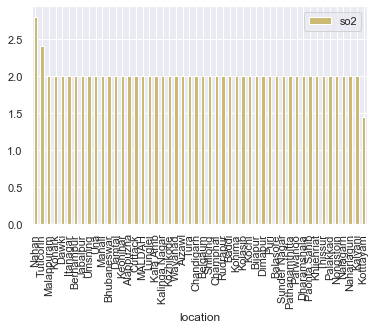

In [47]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')


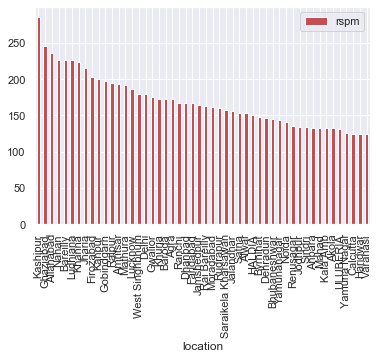

In [48]:
# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')



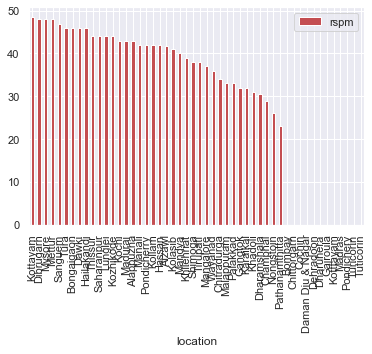

In [49]:
# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')


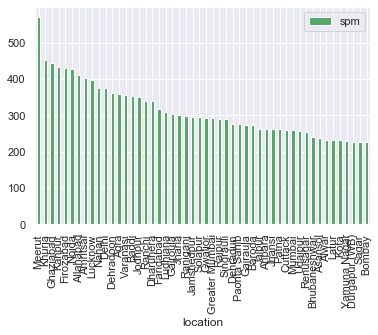

In [51]:
# spm = PM10 - location wise - first 50
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'g')


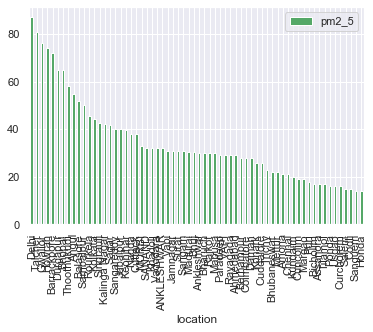

In [56]:
# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'g')

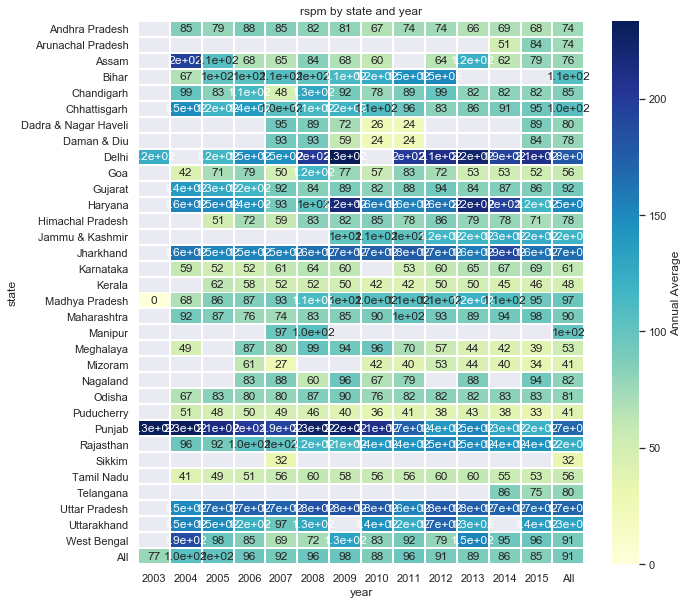

In [57]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})


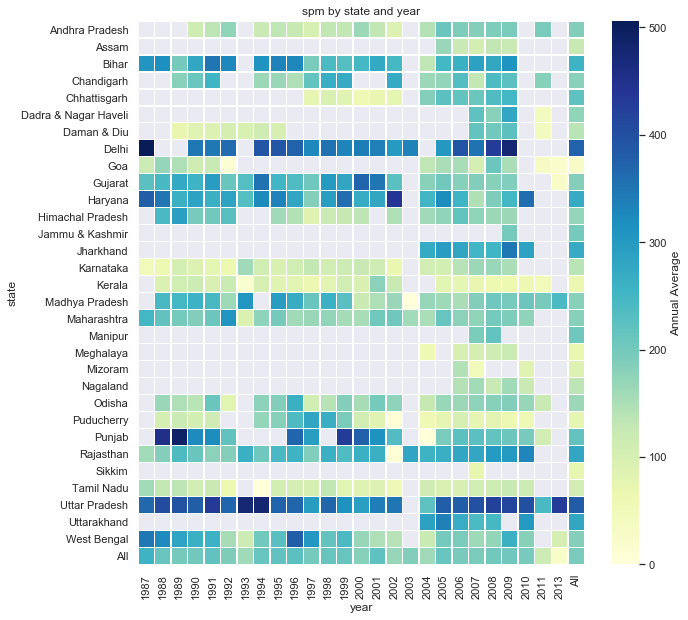

In [60]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})

In [61]:
print(df.shape)

(396157, 10)


## Conclusion

!)From the above analysis, we see that the majorly affected states in India by air pollution belong to the NORTHERN region.
States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require Immediate action.

2)We also see from statistical analysis — scatter plots that the states with high rspm concentrations also have high spm concentrations.

3)Also conclude that if state has high level of pollution,there were some regions in the states that were not polluted.

4)On the basis of Statistical Analysis, we also conclude that scatter plots that the states with high rspm concentrations also have high spm concentrations.

5)From the heatmap, we conclude that some states were heavily polluted in the early stages(1980 to 2000) but, later, were taken care of.The reason for the decrease could be awareness in citizens and government policies.